<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

<div style="text-align: center;">

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZG51ejh3MHMzeGdxeHhybmswYzdwNnIxZDZrNzduenVtbnJma3VlZyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/YSTQzEmYTgCpCa5pxB/giphy.gif" width="500" height="300" />

</div>

<span style= "color: #5a8d84 ">
<div style="text-align: center">

# 🔎 **Estacionariedad**

</div>
</span>

Para hacer inferencias estadísticas en la estructura de un proceso estocástico (o serie de tiempo) sobre el histórico observado del proceso, normalmente se deben hacer algunas suposiciones simplificadoras (presumiblemente razonables) sobre esa estructura. El supuesto más importante es el de  **estacionariedad**.


### ▶️ **Estacionariedad descriptiva**

una serie es estacionaria cuando es estable a lo largo del tiempo, es
decir, cuando la **media** y **varianza** 🥇 son constantes en el tiempo. Esto se
refleja gráficamente en que los valores de la serie tienden a oscilar
alrededor de una media constante y la variabilidad con respecto a esa
media también permanece constante en el tiempo.

No estacionarias Son series en las cuales la tendencia y/o
variabilidad cambian en el tiempo.



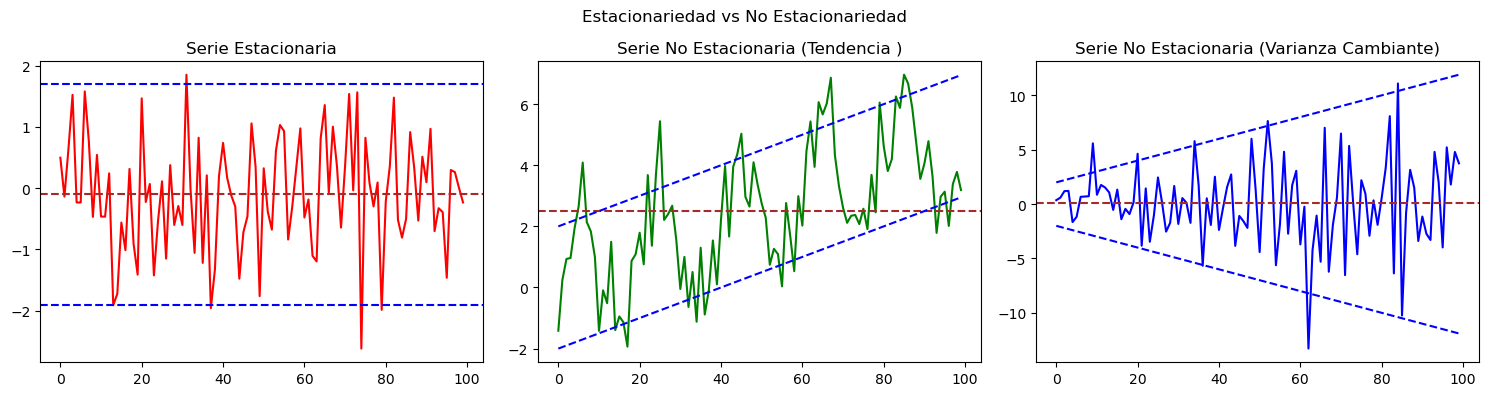

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear datos
np.random.seed(42)
t = np.arange(100)

# Serie estacionaria (ruido blanco)
stationary = np.random.normal(loc=0, scale=1, size=100)

# Serie no estacionaria con tendencia y estacionalidad
trend = 0.05 * t
seasonality = 2 * np.sin(t * 2 * np.pi / 20)
non_stationary = trend + seasonality + np.random.normal(loc=0, scale=1, size=100)

# Serie no estacionaria con varianza cambiante
heteroscedastic = (1 + 0.05 * t) * np.random.normal(loc=0, scale=1, size=100)

# Graficar las series
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Serie estacionaria
t_mean = np.mean(stationary)
t_std = np.std(stationary)
axes[0].plot(t, stationary, color='red')
axes[0].axhline(y=t_mean, color='brown', linestyle='--')
axes[0].axhline(y=t_mean + 2 * t_std, color='blue', linestyle='--')
axes[0].axhline(y=t_mean - 2 * t_std, color='blue', linestyle='--')
axes[0].set_title("Serie Estacionaria")

# Serie no estacionaria (tendencia y estacionalidad)
t_mean = np.mean(non_stationary)
axes[1].plot(t, non_stationary, color='green')
axes[1].axhline(y=t_mean, color='brown', linestyle='--')
axes[1].plot(t, trend + seasonality.max(), color='blue', linestyle='--')
axes[1].plot(t, trend - seasonality.max(), color='blue', linestyle='--')
axes[1].set_title("Serie No Estacionaria (Tendencia )")

# Serie no estacionaria (varianza cambiante)
t_mean = np.mean(heteroscedastic)
axes[2].plot(t, heteroscedastic, color='blue')
axes[2].axhline(y=t_mean, color='brown', linestyle='--')
axes[2].plot(t, (1 + 0.05 * t) * 2, color='blue', linestyle='--')
axes[2].plot(t, -(1 + 0.05 * t) * 2, color='blue', linestyle='--')
axes[2].set_title("Serie No Estacionaria (Varianza Cambiante)")

plt.suptitle("Estacionariedad vs No Estacionariedad")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


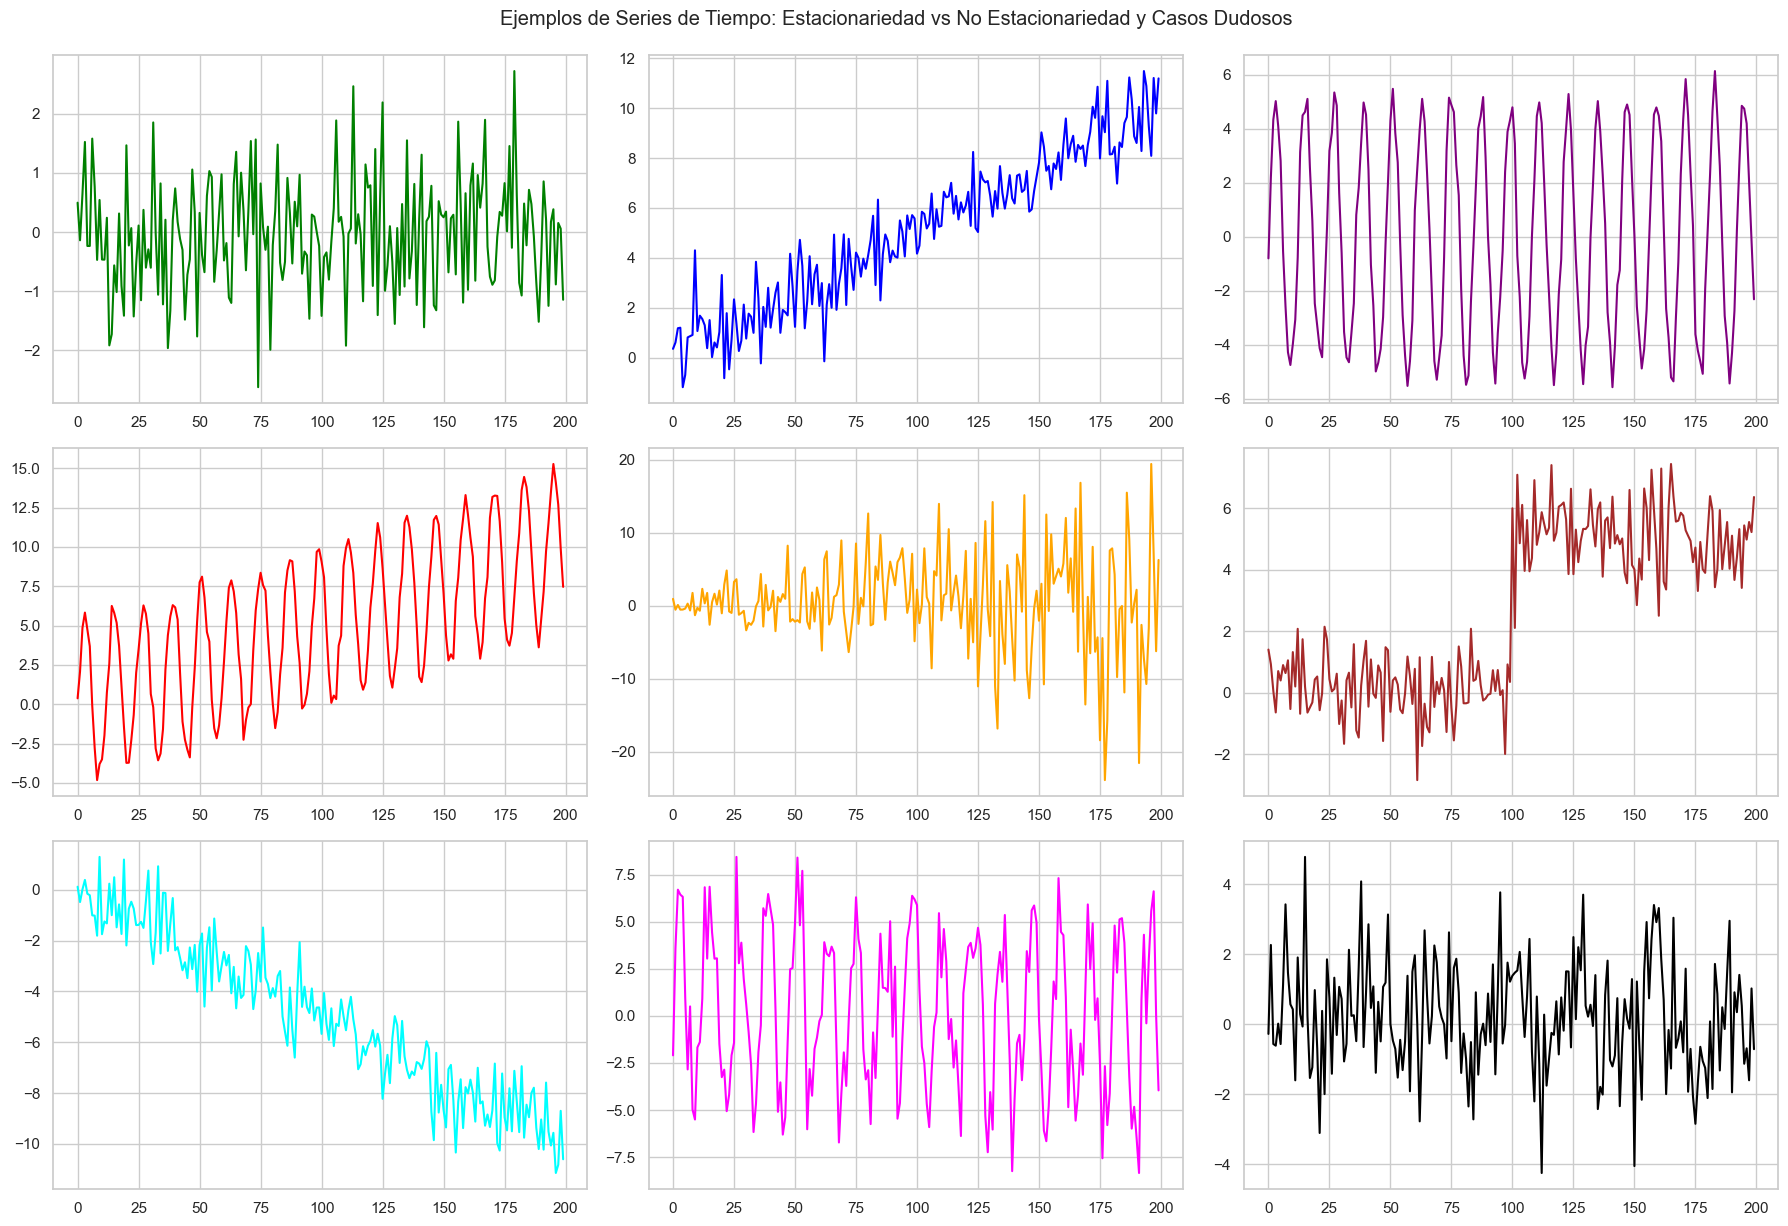

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# C ejemplos de estacionariedad y no estacionariedad
np.random.seed(42)
t = np.arange(200)

# Serie estacionaria: ruido blanco
stationary_series = np.random.normal(loc=0, scale=1, size=200)
# Serie no estacionaria: tendencia
trend_series = 0.05 * t + np.random.normal(loc=0, scale=1, size=200)
# Serie no estacionaria: estacionalidad
seasonal_series = 5 * np.sin(2 * np.pi * t / 12) + np.random.normal(loc=0, scale=0.5, size=200)
# Serie no estacionaria: tendencia + estacionalidad
trend_seasonal_series = 0.05 * t + 5 * np.sin(2 * np.pi * t / 12) + np.random.normal(loc=0, scale=0.5, size=200)
# Serie con varianza cambiante
heteroscedastic_series = (1 + 0.05 * t) * np.random.normal(loc=0, scale=1, size=200)
# Serie con cambio estructural
structural_break_series = np.concatenate([np.random.normal(loc=0, scale=1, size=100), np.random.normal(loc=5, scale=1, size=100)])
# Serie con tendencia decreciente
decreasing_trend_series = -0.05 * t + np.random.normal(loc=0, scale=1, size=200)
# Serie con estacionalidad y ruido blanco
seasonal_noise_series = 5 * np.sin(2 * np.pi * t / 12) + np.random.normal(loc=0, scale=2, size=200)
# Serie confusa con patrón incierto
confusing_series = np.sin(2 * np.pi * t / 30) + np.random.normal(loc=0, scale=1.5, size=200)
# Graficar las series
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes[0, 0].plot(t, stationary_series, color='green')
axes[0, 1].plot(t, trend_series, color='blue')
axes[0, 2].plot(t, seasonal_series, color='purple')
axes[1, 0].plot(t, trend_seasonal_series, color='red')
axes[1, 1].plot(t, heteroscedastic_series, color='orange')
axes[1, 2].plot(t, structural_break_series, color='brown')
axes[2, 0].plot(t, decreasing_trend_series, color='cyan')
axes[2, 1].plot(t, seasonal_noise_series, color='magenta')
axes[2, 2].plot(t, confusing_series, color='black')
plt.tight_layout()
plt.suptitle("Ejemplos de Series de Tiempo: Estacionariedad vs No Estacionariedad y Casos Dudosos", y=1.02)
plt.show()


<div style=" font-family: Arial, sans-serif; background-color:rgba(31, 179, 248, 0.18); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

<div style="text-align: center;">

## 🔎 **Estacionariedad Fuerte y Débil.**

</div>

Una serie de tiempo se puede ver como un proceso estocástico, se dice que es estacionario si su media y varianza son constantes en el tiempo y si el valor de la covarianza entre 2 periodos depende sólo de la distancia o rezago entre los tiempos.

Sea $Y_t$ una serie de tiempo con las siguientes propiedades se dice que es debilmente estacionaria o simplemente estacionaria:



  - 1️⃣ $E(y_t)$ es  constante para todo $t$.

  - 2️⃣ $Var(y_t)$ es constante para todo $t$ y,

  - 3️⃣ $Cov(y_t,y_{t+h})$ sólo depende de $h$ para cualquier $t$
 
 La condición adicional para que una serie de tiempo sea fuertemente estacionaria es que la distribución conjunta de $Y_{t_1},Y_{t_2}, \cdots, Y_{t_n}$ es la misma que la distribución conjunta de $Y_{t_1-k}, Y_{t_2-k}, \cdots, Y_{t_n-k}$ para todas las opciones de puntos de tiempo $t_1, t_2, \cdots, t_n$ y todas las opciones de rezago temporal $k$. es decir, la distribución sólo depende de la diferencia de tiempo $h$ y no del tiempo $(t_1,...,t_k)$



<span style="color: red;">
*En la práctica, buscamos que los datos sean estacionarios para poder proseguir con el tratamiento estadístico de los mismos.*
</span>



<span style="color: red;">
**La estacionariedad es un concepto fundamental para el análisis
de las series de tiempo.** 
</span>




- La estacionariedad significa que el proceso mediante el cual se crearon los datos, es constante en el tiempo.

- 🚫 **CUIDADO**: Esto no significa que los datos no puedan cambiar. Significa que los supuestos distribucionales del mecanismo que genera los datos son constantes en el
tiempo.
- El punto de partida de la metodología Box-Jenkins es la estacionariedad. De ahí su importancia práctica.



In [3]:
import pandas as pd
des_mor=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/Morosidad_desempleo.xlsx")
des_mor

,Año(aaaa)-Mes(mm),Desempleo,Morosidad,Desempleo1,Desempleo2
0,2008-01,0.130790,0.069023,11.108512,0.111085
1,2008-02,0.119855,0.070206,11.056009,0.110560
2,2008-03,0.112245,0.071648,11.231673,0.112317
3,2008-04,0.111293,0.071474,10.920404,0.109204
4,2008-05,0.108382,0.073856,10.806070,0.108061
...,...,...,...,...,...
129,2018-10,0.090612,0.102701,9.740359,0.097404
130,2018-11,0.087583,0.101087,10.051672,0.100517
131,2018-12,0.097211,0.099856,10.366560,0.103666
132,2019-1,0.127955,0.100019,10.296451,0.102965


In [4]:
des_mor.columns

Index(['Año(aaaa)-Mes(mm)', 'Desempleo', 'Morosidad', 'Desempleo1',
       'Desempleo2'],
      dtype='object')

In [5]:
des_mor['Año(aaaa)-Mes(mm)'] = pd.to_datetime(des_mor['Año(aaaa)-Mes(mm)'], format='%Y-%m')
des_mor.set_index('Año(aaaa)-Mes(mm)', inplace=True)
des_mor

,Desempleo,Morosidad,Desempleo1,Desempleo2
Año(aaaa)-Mes(mm),,,,
2008-01-01,0.130790,0.069023,11.108512,0.111085
2008-02-01,0.119855,0.070206,11.056009,0.110560
2008-03-01,0.112245,0.071648,11.231673,0.112317
2008-04-01,0.111293,0.071474,10.920404,0.109204
2008-05-01,0.108382,0.073856,10.806070,0.108061
...,...,...,...,...
2018-10-01,0.090612,0.102701,9.740359,0.097404
2018-11-01,0.087583,0.101087,10.051672,0.100517
2018-12-01,0.097211,0.099856,10.366560,0.103666


<span style= "color: #5a8d84 ">

<div style="text-align: center;">

## ➡️ **Ruido Blanco**

</div> 

</span>


El objetivo de las Series Temporales es descomponer la serie observada en dos partes: una es la parte dependiente del pasado y la otra la parte impredecible

$$Y_t=f(Y_{(t-1)}, Y_{(t-2)},....,Y_1)+ a_t $$

- Si todas las series que observamos en la realidad fuesen Ruido Blanco serían impredecibles y no habría ningún modelo que proponer.


Un **Ruido Blanco** es una serie tal que su media es cero, la varianza es constante y es incorrelacionada.


  - ☑️    $E(a_t)=0$

  - ☑️    $Var(a_t)=\sigma_a^2$

  - ☑️    $cov(a_t,a_{t+_h})=0$   



Se trata de un proceso en el que todas sus variables son independientes.


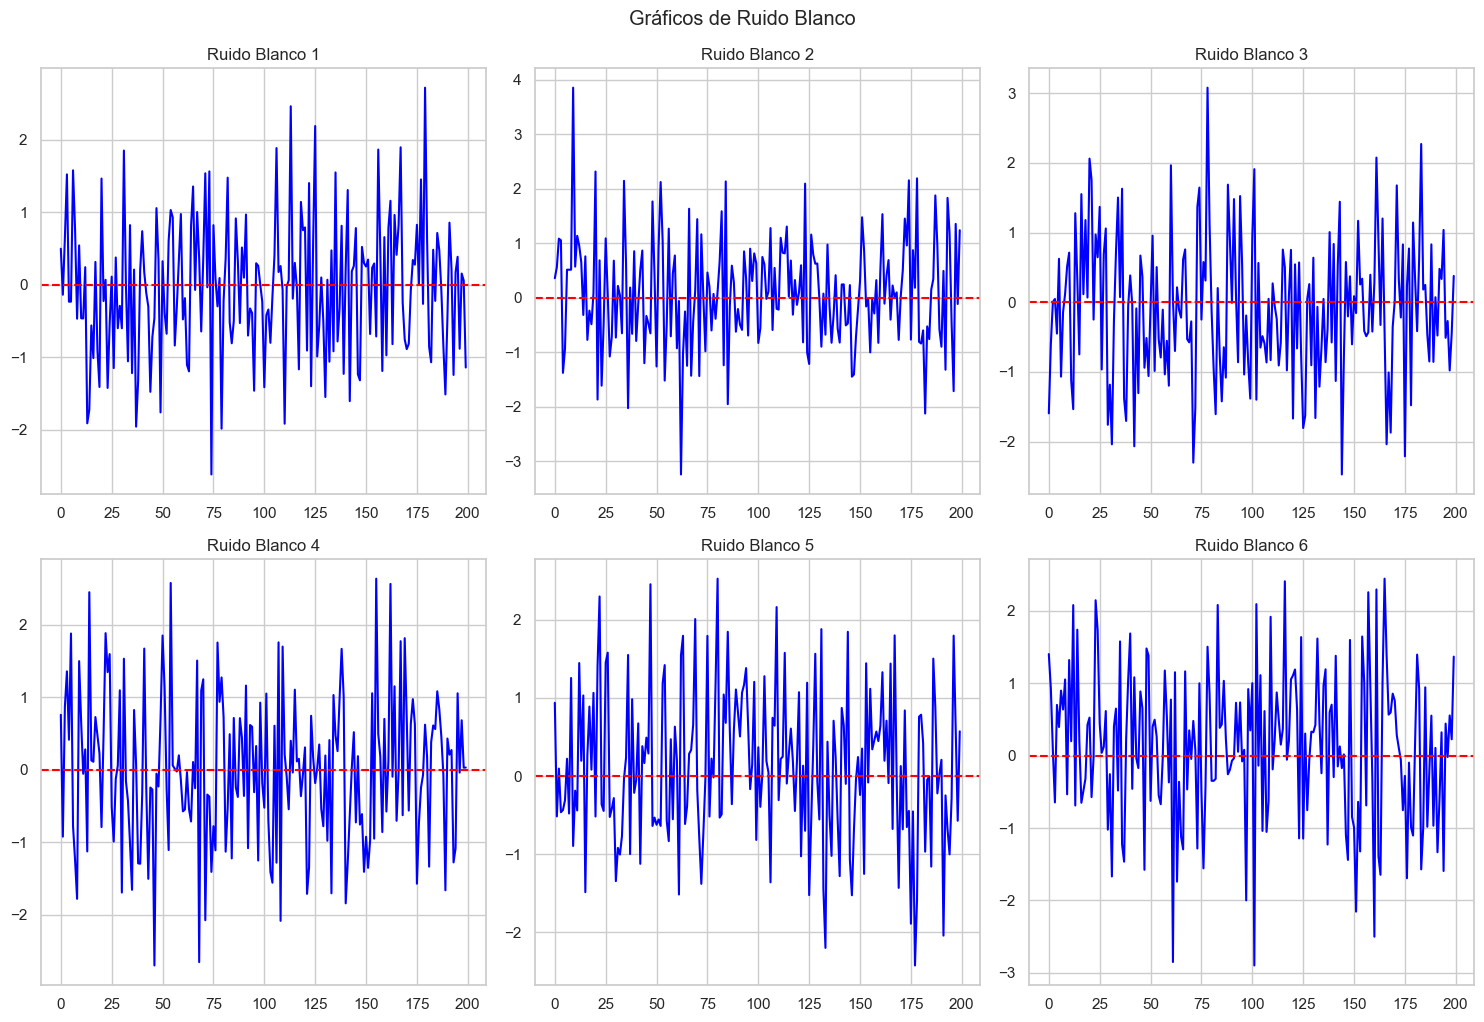

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generar múltiples gráficos de ruido blanco
np.random.seed(42)
t = np.arange(200)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    noise = np.random.normal(loc=0, scale=1, size=200)
    ax.plot(t, noise, color='blue')
    ax.set_title(f"Ruido Blanco {i+1}")
    ax.axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.suptitle("Gráficos de Ruido Blanco", y=1.02)
plt.show()


## ❎ **Eliminación de tendencia**

Una forma sencilla de eliminar una tendencia aproximadamente lineal es diferenciar la serie, es decir,
considerar la serie de diferencias entre una observación y la anterior
en lugar de la serie original. Si $x_t$ es una serie contenida en $x$,
para calcular $$∇x_t=x_t−x_{t−1}$$ 


In [7]:
from statsmodels.datasets import get_rdataset
df=get_rdataset("AirPassengers").data
df.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [8]:
import pandas as pd
# Convertir el índice a formato datetime si es necesario
df['time'] = pd.date_range(start='1949-01', periods=len(df), freq='ME')
df.set_index('time', inplace=True)
df

,value
time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461


In [9]:
import hvplot.pandas
df.hvplot(y='value', title='Pasajeros de Aerolíneas', xlabel='Fecha', ylabel='Pasajeros', width=800, height=400)

:Curve   [time]   (value)

### 🎯 diferencia 

In [10]:
df['value'].diff().hvplot(title='Diferencia de Pasajeros de Aerolíneas', xlabel='Fecha', ylabel='Diferencia', width=800, height=400)

:Curve   [time]   (value)

In [11]:
data=pd.DataFrame()
data["Airpassenger"]=df['value']
data["Diferencia"]=df['value'].diff()
data

,Airpassenger,Diferencia
time,,
1949-01-31,112,NaN
1949-02-28,118,6.0
1949-03-31,132,14.0
1949-04-30,129,-3.0
1949-05-31,121,-8.0
...,...,...
1960-08-31,606,-16.0
1960-09-30,508,-98.0
1960-10-31,461,-47.0


## 🔍 **MODELOS**

Uno de los modelos de tipo ARIMA más simples es un modelo en el que utilizamos un modelo lineal para predecir el valor en el momento actual utilizando el valor en el momento anterior. Esto se llama un modelo *AR (1)* , que significa modelo **autorregresivo de orden 1** . 

- El orden del modelo indica cuántas veces anteriores usamos para predecir el tiempo presente.    



### Modelo **AR($1$)**

teóricamente, el modelo **AR ($1$)** está escrito
    
$$x_t = \delta + \phi_1 x_{t-1} + w_t$$
    
▶️ $w_t \overset{iid}{\sim} N(0, \sigma^2_w)$ lo que significa que los errores se distribuyen independientemente con una distribución normal que tiene media 0 y varianza constante

▶️ Propiedades de los errores. $w_t$  son independientes de $x$.




### Modelo **AR(2)**

$$x_t = \delta + \phi_1 x_{t-1}+ \phi_2 x_{t-2} + w_t$$

### Modelo **AR($p$)**


$$x_t = \delta + \phi_1 x_{t-1}+ \phi_2 x_{t-2}+ \cdots\phi_{p}x_{t-p}  + w_t$$

    



## ▶️ **Función de autocorrelación (ACF)**

El **ACF** de la serie da correlaciones entre $x_t$ y $x_{t-h}$  para  $h= 1, 2, 3$, etc.


Teóricamente, la autocorrelación entre $x_t$  y $x_{t-h}$ es igual


**Definición Formal:**

La **Función de Autocorrelación** $\rho_k $ en un retardo $k $ es una medida de la correlación entre los valores de una serie de tiempo $\{X_t\} $ y los valores de la misma serie en retardos $k $, es decir, entre $X_t $ y $X_{t-k} $. Matemáticamente, la ACF en un retardo $k $ se define como:


<div style="background-color:rgba(200, 204, 206, 0.12); padding: 15px; border-radius: 10px;">

$$\rho_k = \frac{\text{Cov}(X_t, X_{t-k})}{\text{Var}(X_t)} 💡$$

</div>


donde:

- $\text{Cov}(X_t, X_{t-k}) $ es la covarianza entre $X_t $ y $X_{t-k} $.
- $\text{Var}(X_t) $ es la varianza de la serie de tiempo.

Para una serie temporal estacionaria, la ACF depende solo del retardo $k $ y no del tiempo $t $.

**Propiedades:**
- $\rho_0 = 1 $, porque la autocorrelación en el retardo cero es la correlación de la serie consigo misma.

- $\rho_k $ es simétrica respecto a $k $, es decir, $\rho_k = \rho_{-k} $.

- La ACF es útil para identificar el orden del proceso MA (Media Móvil).


In [12]:
df

,value
time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461


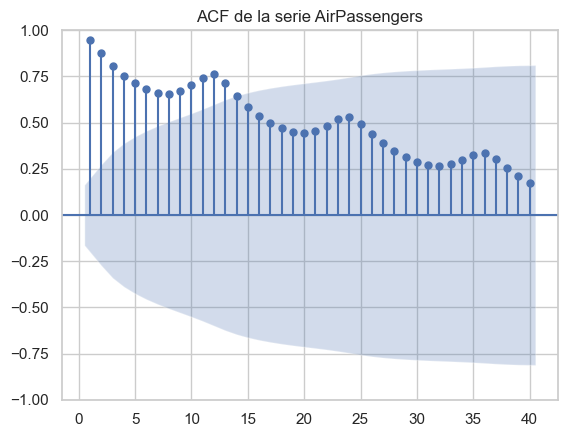

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['value'], lags=40, zero=False, alpha=0.05)
plt.title('ACF de la serie AirPassengers')
plt.show()

## Función de autocorrelación parcial PACF

En general, una correlación parcial es una correlación condicional. Es la correlación entre dos variables bajo el supuesto de que conocemos y tenemos en cuenta los valores de algún otro conjunto de variables.


**Definición Formal:**

La **Función de Autocorrelación Parcial** $ \phi_{kk} $ en un retardo $ k $ mide la correlación entre $ X_t $ y $ X_{t-k} $ después de eliminar el efecto de las autocorrelaciones de todos los retardos menores (1, 2, ..., $ k-1 $). Se define como la autocorrelación entre $ X_t $ y $ X_{t-k} $ condicionada a $ X_{t-1}, X_{t-2}, \dots, X_{t-(k-1)} $.

Matemáticamente, para una serie estacionaria $ \{X_t\} $, la PACF en el retardo $ k $ está definida por la siguiente relación de recursión:

$$
\phi_{kk} = \frac{\text{Cov}(X_t - \hat{X}_{t|t-1,\dots,t-(k-1)}, X_{t-k} - \hat{X}_{t-k|t-k+1,\dots,t-(k-1)})}{\sqrt{\text{Var}(X_t - \hat{X}_{t|t-1,\dots,t-(k-1)}) \cdot \text{Var}(X_{t-k} - \hat{X}_{t-k|t-k+1,\dots,t-(k-1)})}}
$$

donde $ \hat{X}_{t|t-1,\dots,t-(k-1)} $ es la mejor predicción lineal de $ X_t $ basada en las observaciones $ X_{t-1}, X_{t-2}, \dots, X_{t-(k-1)} $.

**Propiedades:**

- La PACF en el retardo $ k = 1 $ es simplemente la ACF en $ k = 1 $.

- La PACF puede ser utilizada para identificar el orden del proceso AR (Autorregresivo).




Para una serie temporal, la autocorrelación parcial entre $x_t$ y $x_{t-h}$  se define como la correlación condicional entre $x_t$ y $x_{t-h}$ condicionado a $x_{t-h+1}$ , ...,$x_{t-1}$ , el conjunto de observaciones que se encuentran entre los puntos de tiempo  $t$ y $t-h$


-  La  autocorrelación parcial de primer orden se definirá para que sea igual a la autocorrelación de primer orden.

- El 2nd autocorrelación parcial orden (lag) es

$$\dfrac{\text{Cov}(x_t, x_{t-2}| x_{t-1})}{\sqrt{\text{Var}(x_t|x_{t-1})\text{Var}(x_{t-2}|x_{t-1})}}$$



### Cálculo de $ \phi_{22} $ usando las Ecuaciones de Yule-Walker

1. **Expresión General de Yule-Walker:**

   $$
   \rho_i = \phi_{j1} \rho_{i-1} + \phi_{j2} \rho_{i-2} + \dots + \phi_{jj} \rho_{i-j}
   $$

2. **Cálculo de $ \phi_{11} $:**

   Para $ j = 1 $ y $ i = 1 $:

   $$
   \rho_1 = \phi_{11}
   $$

3. **Cálculo de $ \phi_{22} $:**

   Se establece un sistema de ecuaciones para $ j = 2 $:

   - Para $ i = 1 $:

     $$
     \rho_1 = \phi_{21} + \phi_{22} \rho_1
     $$

   - Para $ i = 2 $:

     $$
     \rho_2 = \phi_{21} \rho_1 + \phi_{22}
     $$

   Estas ecuaciones se pueden expresar en forma matricial:

   $$
   \begin{pmatrix}
   \rho_1 \\
   \rho_2
   \end{pmatrix}
   =
   \begin{pmatrix}
   1 & \rho_1 \\
   \rho_1 & 1
   \end{pmatrix}
   \begin{pmatrix}
   \phi_{21} \\
   \phi_{22}
   \end{pmatrix}
   $$

4. **Resolución por la Regla de Cramer:**

   Utilizando la regla de Cramer, se calcula $ \phi_{22} $:

   $$
   \phi_{22} = \frac{\rho_1^2 - \rho_2}{1 - \rho_1^2}
   $$



**Nota:** Calcular manualmente la Función de Autocorrelación Parcial (PACF) puede ser un proceso complejo. Esto se debe a que, para cada retardo, es necesario ajustar la correlación entre las observaciones eliminando la influencia de todos los retardos anteriores. Este ajuste se realiza resolviendo sistemas de ecuaciones lineales, frecuentemente utilizando las ecuaciones de Yule-Walker. 



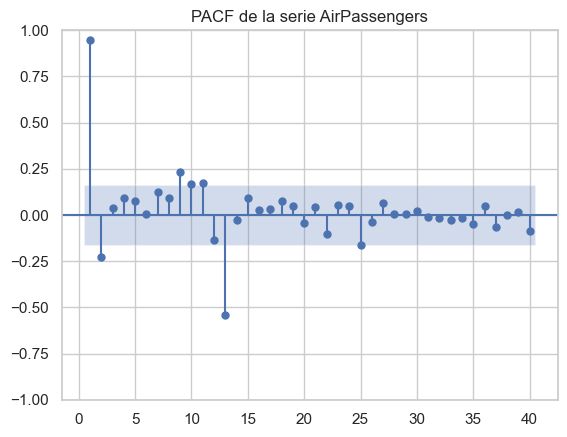

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['value'], lags=40, zero=False, alpha=0.05)
plt.title('PACF de la serie AirPassengers')
plt.show()


## Propiedades de la AR (1)
    
    
- La media (teórica) de $x_t$ es: $E(x_t)=\mu = \dfrac{\delta}{1-\phi_1}$

- La varianza de $x_t$ es: $\text{Var}(x_t) = \dfrac{\sigma^2_w}{1-\phi_1^2}$

- La correlación $h$ entre observaciones períodos de tiempo separados es $\rho_h = \phi^h_1$
 
    
Esto define el ACF teórico para una variable d


¡Nota!  $\phi_1$ es la pendiente en el modelo **AR ($1$)** y ahora vemos que también es la autocorrelación de retraso 1


### Simulaciones modelo autoregresivo AR($1$) con $\phi$ = 0.5


$$y_t = 0.5  y_{t-1} + w_t$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ipywidgets as widgets
from IPython.display import display


def plot_ar1(phi):
    # Establecer semilla para reproducibilidad
    np.random.seed(123)

    # Simular un proceso AR(1) con coeficiente phi
    ar = np.array([1, -phi])  # AR(1) con coeficiente phi
    ma = np.array([1])  # MA(0)
    ar1 = ArmaProcess(ar, ma).generate_sample(nsample=1000)

    # Graficar la serie, ACF y PACF
    plt.figure(figsize=(18, 5))

    # Gráfica de la serie
    plt.subplot(1, 3, 1)
    plt.plot(ar1)
    plt.title(f"Serie AR(1) con φ={phi}")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")

    # ACF
    plt.subplot(1, 3, 2)
    plot_acf(ar1, zero=False, ax=plt.gca())
    plt.title("ACF de AR(1)")

    # PACF
    plt.subplot(1, 3, 3)
    plot_pacf(ar1, zero=False, ax=plt.gca())
    plt.title("PACF de AR(1)")

    plt.tight_layout()
    plt.show()


# Crear slider interactivo
phi_slider = widgets.FloatSlider(value=0.5, min=-0.99, max=0.99, step=0.01, description="φ")
widgets.interactive(plot_ar1, phi=phi_slider)


interactive(children=(FloatSlider(value=0.5, description='φ', max=0.99, min=-0.99, step=0.01), Output()), _dom…


<div align="center">

## **Modelos de media móvil (MA)**

</div>
 






### MA($1$)


$$x_t = \mu + w_t -\theta_1w_{t-1}$$

 
 $w_t \overset{iid}{\sim} N(0, \sigma^2_w)$



### MA(2)
 
$$x_t = \mu + w_t +\theta_1w_{t-1}+\theta_2w_{t-2}$$
 
 $w_t \overset{iid}{\sim} N(0, \sigma^2_w)$

### MA(q)


$$x_t = \mu + w_t +\theta_1w_{t-1}+\theta_2w_{t-2}+\dots + \theta_qw_{t-q}$$


<span style="color: blue;">
¡Nota!
Muchos libros de texto y programas de software definen el modelo con signos negativos antes de $\theta$ . Esto no cambia las propiedades teóricas generales del modelo, aunque sí cambia los signos algebraicos de los valores de coeficientes estimados y (no cuadrado)términos en fórmulas para ACF y variaciones. 
</span>


## Propiedades teóricas de una serie temporal con un modelo MA ($1$)
    
    
* La media es $E(x_t)=\mu$
* La varianza es $Var(x_t)= \sigma^2_w(1+\theta^2_1)$
* La función de autocorrelación (ACF) es:
$\rho_1 = \dfrac{\theta_1}{1+\theta^2_1}, \text{ and } \rho_h = 0 \text{ for } h \ge 2$


        
<span style="color: blue;">
Nota!
Que el único valor distinto de cero en el ACF teórico es para el retraso 1 . Todas las demás autocorrelaciones son 0. Por lo tanto, una muestra de ACF con una autocorrelación significativa solo en el retraso 1 es un indicador de un posible modelo de MA ($1$).}
</span>


## Simulaciones $1$


In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import ipywidgets as widgets
from IPython.display import display

def plot_ma(q, **theta_dict):
    # Establecer semilla para reproducibilidad
    np.random.seed(123)
    
    # Convertir valores de los sliders en una lista de coeficientes theta
    thetas = [theta_dict[f'theta{i+1}'] for i in range(q)]
    
    # Definir proceso MA(q) con coeficientes theta
    ar = np.array([1])  # AR(0)
    ma = np.concatenate(([1], thetas))  # MA(q) con coeficientes
    ma_q = ArmaProcess(ar, ma).generate_sample(nsample=1000)
    
    # Graficar la serie, ACF y PACF
    plt.figure(figsize=(18, 5))
    
    # Gráfica de la serie
    plt.subplot(1, 3, 1)
    plt.plot(ma_q)
    plt.title(f"Serie MA({q}) con θ={thetas}")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    
    # ACF
    plt.subplot(1, 3, 2)
    plot_acf(ma_q, zero=False, ax=plt.gca())
    plt.title(f"ACF de MA({q})")
    
    # PACF
    plt.subplot(1, 3, 3)
    plot_pacf(ma_q, zero=False, ax=plt.gca())
    plt.title(f"PACF de MA({q})")
    
    plt.tight_layout()
    plt.show()

def interactive_ma(q):
    theta_sliders = {f'theta{i+1}': widgets.FloatSlider(value=0.5, min=-0.99, max=0.99, step=0.01, description=f"θ{i+1}") for i in range(q)}
    return widgets.interactive(plot_ma, q=widgets.IntSlider(value=q, min=1, max=5, step=1, description="q"), **theta_sliders)

display(interactive_ma(1))


interactive(children=(IntSlider(value=1, description='q', max=5, min=1), FloatSlider(value=0.5, description='θ…

## Modelos de media móvil autorregresiva (ARMA)

Al combinar los dos modelos  **MA** y **AR**, obtenemos lo que se llama un modelo de promedio móvil autoregresivo **(ARMA)**. 

El caso más simple, es el proceso **ARMA ($1$,$1$)** como


\begin{equation}
y_{t}=\phi y_{t-1}+\varepsilon_{t}+\theta \varepsilon_{t-1}  
\tag{3.1}
\end{equation}


En la discusión relacionada con los procesos de promedio móvil, notamos que el **ACF** daría una indicación del orden del proceso, mientras que el **PACF** disminuiría lentamente. En contraste, cuando discutimos los modelos autoregresivos, notamos que el **PACF** daría una indicación del orden del proceso, mientras que el **ACF** disminuiría lentamente.


Cuando consideramos el proceso *ARMA* combinado, generalmente notamos que ambas funciones deberían decaer ligeramente y, como tal, puede ser difícil descifrar el orden del modelo ARMA combinado. 

Un ejemplo de las funciones **ACF** y **PACF** para un modelo **ARMA ($1$,$1$)**. A pesar del hecho de que sabemos que estamos tratando con un modelo ARMA (1,1), las autocorrelaciones en **ACF** y **PACF** parecen diferir de cero en



##  Diferenciación
A menudo, la diferenciación se usa para dar cuenta de la no estacionariedad que ocurre en forma de tendencia y / o estacionalidad.


La diferencia  $x_t-x_{t-1}$  puede expresarse como  $(1-B)x_{t}$.


Una notación alternativa para una diferencia es

$$(\boldsymbol{1-B})=\triangle$$

Así  $$\triangle x_t = \boldsymbol{(1-B)}x_t = x_t-x_{t-1}$$

Un superindice define una diferencia de retraso igual al subíndice. Por ejemplo,

$$\triangle^{12} x_t = (\boldsymbol{1-B}^{12})x_t = x_t-x_{t-12}$$

Este tipo de diferencia a menudo se usa con datos mensuales que exhiben estacionalidad




En general, se sabe que el punto de partida para el análisis en series de tiempo estacionarias. Es decir, que los datos involucrados cumplan unas exigencias mínimas: 


- Ser constante en media (No tener tendencia en ninguna forma) 
- Ser constante en varianza. 



Si bien el criterio visual es importante para determinar el tratamiento a tomar, son necesarios criterios técnicos para tomar tales decisiones. Es así que se postulan las 



## Las pruebas de raíz unitarias

- notaremos como $I(0)$ a las **Series integradas de orden 0**. Dichas series son aquellas que no presentan problemas de estacionariedad. 

- notaremos como $I(1)$ a las series no estacionarías.

Así, en el caso que sea de nuestro interés saber cuándo una serie es ```bien comportada``` en el sentido de estacionariedad, tenemos la prueba aumentada de **Dickey-Fuller**  o  **Phillips- Perron**
que establecerá si la serie es integrada de orden 1. Es decir, formalmente

$$
\begin{cases}
H_0:y_t\sim I(1)  \ \ \ \ \ \ y_t \text{ no es estacionaria }\\
H_1:y_t\sim I(0)   \ \ \ \ \ \ y_t \text{ es estacionaria }
\end{cases}
$$


En Python, la prueba de Dickey-Fuller aumentada (ADF) se puede realizar con la función `adfuller()` de la librería  `statsmodels.tsa.stattools`




###  Pruebas de Raíz Unitaria en Python

<span style="text-align: center;">

| Prueba               | `statsmodels`                         | `arch.unitroot`                    |
|----------------------|-------------------------------------|-----------------------------------|
| **Dickey-Fuller ADF**  | ✅ `adfuller(y)`                     | ✅ `ADF(y)`                        |
| **Phillips-Perron PP** | ❌ No disponible                     | ✅ `PhillipsPerron(y)`             |

</span>

🚀 **Recomendación:**  
- UsaT `statsmodels` si solo necesita **ADF**.  
- UsaT `arch.unitroot` para **ADF y PP** en análisis más completos.  


<div style=" font-family: Arial, sans-serif; background-color:rgba(31, 179, 248, 0.18); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

<span style="text-align: center">

### 🔎  Fases de la Metodología Box-Jenkins

</span>

La metodología de **Box y Jenkins** consta de cuatro fases principales:

#### 1️⃣ Identificación  
- Aplicar transformaciones para hacer la serie **estacionaria**.  
- Determinar los órdenes **p** (autorregresivo) y **q** (media móvil) del modelo **ARMA** para la serie estacionaria.

####  2️⃣ Estimación  
- **Autorregresivos (AR)** de orden **p**.  
- **Media móvil (MA)** de orden **q**.  

#### 3️⃣ Diagnóstico  
- Los residuos no presentan dependencia temporal.  
- Se comportan como **ruido blanco** (media cero, varianza constante y no autocorrelación).  

#### 4️⃣ Predicción  
Con un modelo validado, se generan pronósticos y se evalúa su precisión.  

🚀 **Conclusión:**  
La metodología Box-Jenkins permite construir modelos ARIMA efectivos para series temporales, asegurando que cumplan con los criterios de estacionariedad y buen ajuste antes de realizar predicciones.  


### ✍️  Identificación

Para la correcta identificación de un modelo **ARIMA**:

- Determinar si la serie  $x_t$ necesita ser transformada para eliminar la **no estacionariedad** en media o varianza (*heterocedasticidad*).  
  🔹 Posibles transformaciones: Logaritmos, Box-Cox, o diferenciación.
- Identificar el grado  $d$ de diferenciación necesario para obtener una serie **estacionaria**.
- La falta de estacionariedad se manifiesta cuando los coeficientes de la función de autocorrelación decrecen lentamente.
- Seleccionar los valores de $p, q$ y, si hay una componente estacional, decidir los órdenes de los operadores estacionales $P, Q$.  
  Para esto, se utilizan las funciones de **autocorrelación (ACF)** y **autocorrelación parcial (PACF)** según el siguiente cuadro:



| **Proceso**      | **Función de Autocorrelación (ACF)** | **Función de Autocorrelación Parcial (PACF)** |
|-----------------|--------------------------------------|----------------------------------------------|
| **MA(q)**       | Solo los **q** primeros coeficientes son significativos. Los demás se anulan bruscamente (coef. 0 para **retardo > q**). | Decrecimiento rápido exponencial atenuado o con ondas sinusoidales. |
| **AR(p)**       | Decrecimiento rápido exponencial atenuado o con ondas sinusoidales. | Solo los **p** primeros coeficientes son significativos. Los demás se anulan bruscamente (coef. 0 para **retardo > p**). |
| **ARIMA(p, d, q)** | Comportamiento irregular en los retardos **(1, ..., q)** con picos. Decrecimiento para retardos posteriores. | Decrecimiento aproximadamente exponencial con atenuaciones o ondas sinusoidales. No se anula en ningún retardo. |



###  ✍️  Estimación del Modelo

En esta fase, se ajustan los coeficientes del modelo **ARIMA(p, d, q)** previamente identificado.  
Esto implica:  

- **Ajustar los coeficientes** de los términos:
  - **Autorregresivos (AR)** de orden **p**.
  - **Media móvil (MA)** de orden **q**.
  - **Diferenciación (d)** si fue necesaria en la fase de identificación.

- **Métodos de estimación más comunes**:
  - **Máxima verosimilitud (MLE)**.
  - **Mínimos cuadrados no lineales**.

- **Criterios de selección de modelo**:
  - **Akaike (AIC)**, **Bayesiano (BIC)** o **Schwarz (SBC)** para comparar modelos y elegir el mejor ajuste.

🔍 **Objetivo**: Obtener un modelo con **coeficientes significativos** y **errores reducidos**, minimizando la autocorrelación en los residuos.


####  ✍️ **Diagnóstico** 

En esta fase, se evalúa si el modelo **ARIMA(p, d, q)** es adecuado mediante el análisis de los residuos.  
El modelo es válido si los residuos cumplen con las siguientes condiciones:


#### Aleatoriedad de los residuos  
Los residuos deben comportarse como **ruido blanco**, es decir:  
- **Media cercana a cero** y **varianza constante**.  
- **No autocorrelación** (los residuos no deben depender de valores anteriores).  
- **Distribución aleatoria**, sin patrones visibles en gráficos de residuos.  

📌 **Pruebas de aleatoriedad**:  
- **Prueba de Ljung-Box** → Detecta autocorrelación en los residuos.  
- **Gráficos de residuos** → Deben mostrar una distribución aleatoria sin tendencias.  
- **Prueba de rachas (Runs Test)** → Evalúa la aleatoriedad de la secuencia de residuos.  

Si los residuos **no son aleatorios**, el modelo debe **ser reestimado o reconsiderado**.  



####  Evaluación de la Normalidad   
La **normalidad de los residuos no es un requisito obligatorio**, pero puede ser útil si:  
- Se desea calcular **intervalos de confianza** o **predicciones probabilísticas**.  
- Se utilizan **pruebas paramétricas** en el análisis.  

📌 **Pruebas de normalidad**:  
- **Jarque-Bera**  
- **Shapiro-Wilk**  
- **Kolmogorov-Smirnov**  

🔍 **Conclusión**:  
✅ **Si los residuos son ruido blanco, el modelo es válido** aunque no sean normales.  
⚠️ **Si presentan colas pesadas o asimetría extrema, puede ser necesario ajustar el modelo**.  


### Evaluación del ajuste del modelo  
Además de analizar los residuos, se debe verificar la calidad del ajuste con:  
- **Criterios de información**: AIC, BIC o SBC para comparar modelos.  
- **Predicciones dentro de la muestra**: Comparar valores ajustados vs. observados.  


### Predicción con el Modelo ARIMA  

Una vez validado el modelo **ARIMA(p, d, q)**, se procede a la fase de predicción, en la cual se generan pronósticos y se evalúa su precisión.  
  
El modelo ARIMA permite realizar predicciones **a corto y largo plazo** con base en la estructura temporal identificada.  
Se pueden generar:  
- **Predicciones dentro de la muestra** (one-step ahead) → Para evaluar la precisión del ajuste.  
- **Predicciones fuera de la muestra** → Para estimar valores futuros.  

📌 **Métodos de predicción más usados**:  
- **Predicción iterativa**: Usa valores previos estimados como entrada para futuros valores.  
- **Predicción directa**: Genera pronósticos independientes para diferentes horizontes de tiempo.  






## Metodología Box Jenkins

<center>

![](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/metodologiabj.png)